In [22]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session



/kaggle/input/mnist-60000-hand-written-number-images/mnist_test.csv
/kaggle/input/mnist-60000-hand-written-number-images/mnist_train.csv


In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
train = pd.read_csv("../input/mnist-60000-hand-written-number-images/mnist_train.csv")
test = pd.read_csv("../input/mnist-60000-hand-written-number-images/mnist_test.csv")

In [25]:
print(train.shape)
print(test.shape)

(59999, 785)
(9999, 785)


In [26]:
train.head(5)

,5,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.608,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
test.head(5)


,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
X_train=train.drop(labels = ['5'],axis = 1) 
Y_train=train['5']
print(X_train.shape)
print(Y_train.shape)

(59999, 784)
(59999,)


In [30]:
Y_train.value_counts()

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5420
Name: 5, dtype: int64

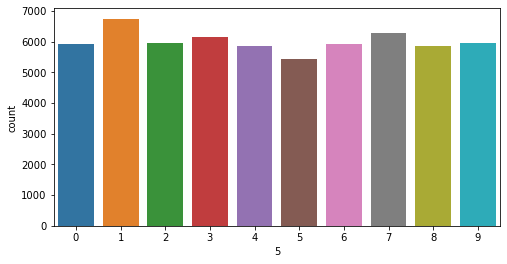

In [31]:
import seaborn as sns
plt.figure(figsize=(8,4))
sns.countplot(x='5', data=train);

In [32]:
test=test.drop(labels = ['5'],axis = 1) 
print(test.shape)

(9999, 784)


In [34]:
X_train=X_train.astype('float32')/255
test=test.astype('float32')/255

In [35]:
test.shape

(9999, 784)

In [36]:
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

In [37]:
from keras.utils.np_utils import to_categorical
Y_train = to_categorical(Y_train, num_classes = 10)

In [38]:
Y_train.shape

(59999, 10)

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size = 0.1, random_state=42)

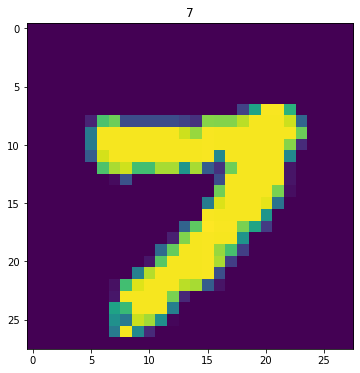

In [40]:
plt.figure(figsize=(6,6))
plt.imshow(X_train[1][:,:,0])
plt.title(Y_train[1].argmax());

In [41]:

from keras.layers import Input,InputLayer, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout
from keras.models import Sequential,Model
from keras.optimizers import SGD
from keras.callbacks import ModelCheckpoint,LearningRateScheduler
import keras
from keras import backend as K

In [42]:
inputShape=(28,28,1)
input = Input(inputShape)

x = Conv2D(64,(3,3),strides = (1,1),name='layer_conv1',padding='same')(input)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D((2,2),name='maxPool1')(x)


x = Conv2D(64,(3,3),strides = (1,1),name='layer_conv2',padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D((2,2),name='maxPool2')(x)

x = Conv2D(32,(3,3),strides = (1,1),name='conv3',padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D((2,2),name='maxPool3')(x)


x = Flatten()(x)
x = Dense(64,activation = 'relu',name='fc0')(x)
x = Dropout(0.25)(x)
x = Dense(32,activation = 'relu',name='fc1')(x)
x = Dropout(0.25)(x)
x = Dense(10,activation = 'softmax',name='fc2')(x)

model = Model(inputs = input,outputs = x,name='Predict')

In [43]:
model.summary()

Model: "Predict"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
layer_conv1 (Conv2D)         (None, 28, 28, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 64)        256       
_________________________________________________________________
activation (Activation)      (None, 28, 28, 64)        0         
_________________________________________________________________
maxPool1 (MaxPooling2D)      (None, 14, 14, 64)        0         
_________________________________________________________________
layer_conv2 (Conv2D)         (None, 14, 14, 64)        36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 64)        256 

In [44]:
from keras.preprocessing.image import ImageDataGenerator

In [45]:
datagen_train = ImageDataGenerator(
    width_shift_range=0.2,  # randomly shift images horizontally 
    height_shift_range=0.2,# randomly shift images vertically 

    horizontal_flip=True) # randomly flip images horizontally

# fit augmented image generator on data
datagen_train.fit(X_train)

In [46]:
# define SGD optimizer
momentum = 0.5
sgd = SGD(lr=0.01, momentum=momentum, decay=0.0, nesterov=False) 

# compile the model
model.compile(loss='categorical_crossentropy',optimizer=sgd, metrics=['accuracy'])

In [47]:

import math
def step_decay(epoch):
    
    
    initial_lrate=0.1
    drop=0.6
    epochs_drop = 3.0
    lrate= initial_lrate * math.pow(drop,  
           math.floor((1+epoch)/epochs_drop))
    return lrate
   

lrate = LearningRateScheduler(step_decay)
callbacks_list = [ lrate]

In [48]:
history=model.fit(X_train, Y_train, validation_data=(X_valid, Y_valid),
                          epochs=35,callbacks=callbacks_list,verbose=1)

Epoch 1/35
1688/1688 [==============================] - 85s 50ms/step - loss: 2.3101 - accuracy: 0.1062 - val_loss: 2.3018 - val_accuracy: 0.1075
Epoch 2/35
1688/1688 [==============================] - 84s 50ms/step - loss: 2.3025 - accuracy: 0.1104 - val_loss: 2.3039 - val_accuracy: 0.1075
Epoch 3/35
1688/1688 [==============================] - 84s 50ms/step - loss: 2.3023 - accuracy: 0.1109 - val_loss: 2.3031 - val_accuracy: 0.1075
Epoch 4/35
1688/1688 [==============================] - 93s 55ms/step - loss: 2.3027 - accuracy: 0.1095 - val_loss: 2.3022 - val_accuracy: 0.1075
Epoch 5/35
1688/1688 [==============================] - 89s 53ms/step - loss: 1.8265 - accuracy: 0.3077 - val_loss: 0.1496 - val_accuracy: 0.9567
Epoch 6/35
1688/1688 [==============================] - 91s 54ms/step - loss: 0.1706 - accuracy: 0.9525 - val_loss: 0.1349 - val_accuracy: 0.9620
Epoch 7/35
1688/1688 [==============================] - 105s 62ms/step - loss: 0.1220 - accuracy: 0.9665 - val_loss: 0.2085 

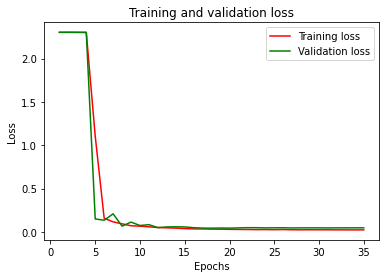

In [49]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, color='red', label='Training loss')
plt.plot(epochs, val_loss, color='green', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

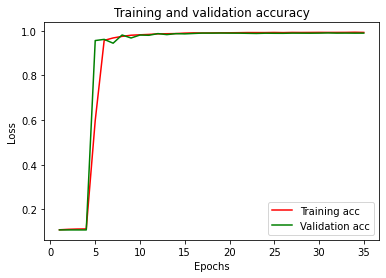

In [50]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, color='red', label='Training acc')
plt.plot(epochs, val_acc, color='green', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [51]:
print("on valid data")
pred1=model.evaluate(X_valid,Y_valid)
print("accuaracy", str(pred1[1]*100))
print("Total loss",str(pred1[0]*100))

on valid data
188/188 [==============================] - 2s 12ms/step - loss: 0.0473 - accuracy: 0.9900
accuaracy 99.00000095367432
Total loss 4.734522849321365


In [52]:
from keras.models import Model
layer_outputs = [layer.output for layer in model.layers]
activation_model = Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(X_train[10].reshape(1,28,28,1))
 
def display_activation(activations, col_size, row_size, act_index): 
    activation = activations[act_index]
    activation_index=0
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*2.5,col_size*1.5))
    for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index], cmap='gray')
            activation_index += 1

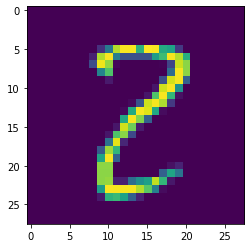

In [53]:
plt.imshow(X_train[10][:,:,0]);

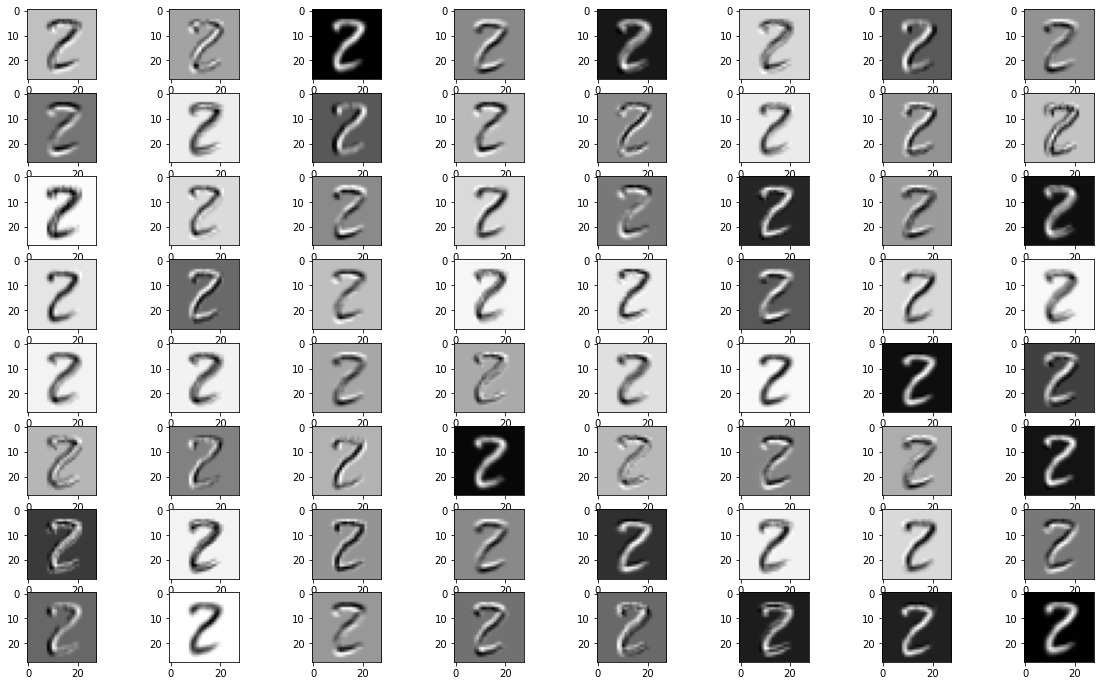

In [54]:
display_activation(activations, 8, 8, 1)

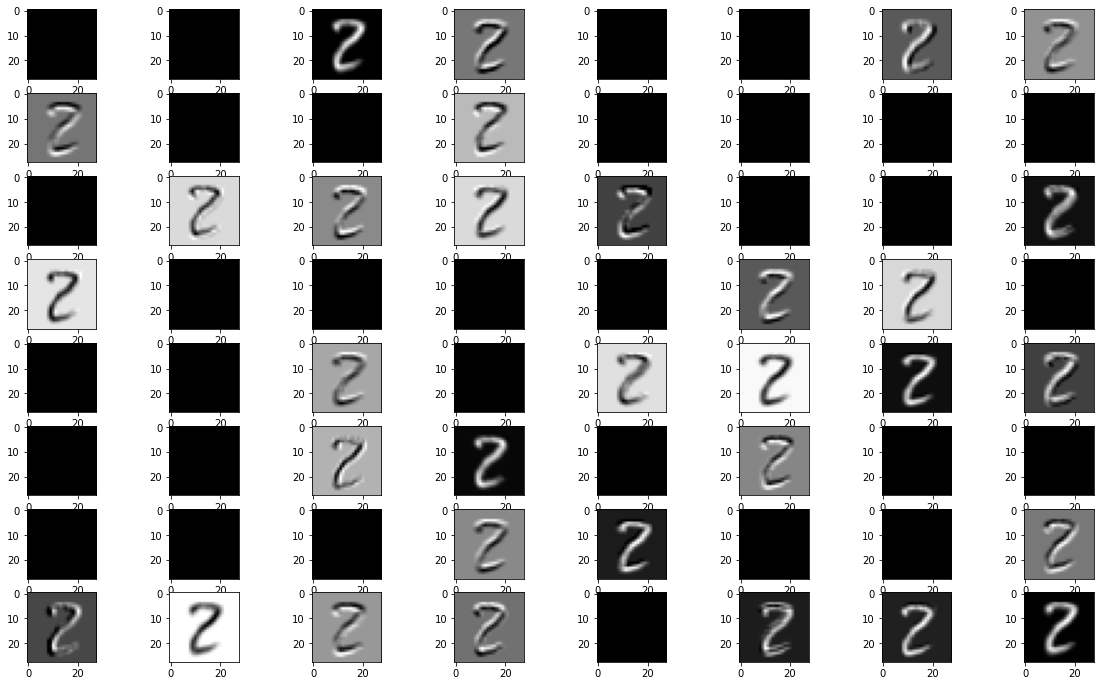

In [55]:
display_activation(activations, 8, 8, 3)

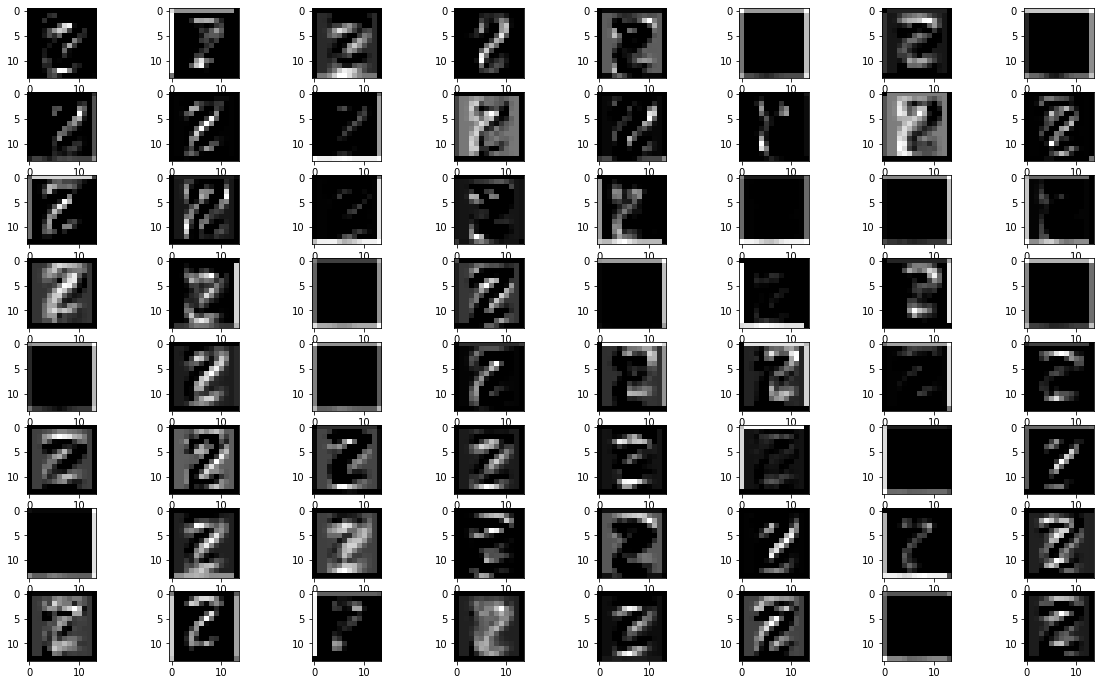

In [56]:
display_activation(activations, 8, 8, 7)

In [57]:
from sklearn.metrics import confusion_matrix
Y_prediction = model.predict(X_valid)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_prediction,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_valid,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(confusion_mtx, annot=True, fmt="d");